In [1]:
import gymnasium as gym
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/amina/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/amina/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/amina/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/home/amina/ana

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/amina/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/amina/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/amina/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/home/amina/ana

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/amina/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/amina/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/amina/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/home/amina/ana

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/amina/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/amina/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/amina/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/home/amina/ana

AttributeError: _ARRAY_API not found

#### 👉We are using the `Taxi-v3` environment from OpenAI's gym: https://gym.openai.com/envs/Taxi-v3/

#### 👉`Taxi-v3` is an easy environment because the action space is small, and the state space is large but finite.

#### 👉Environments with a finite number of actions and states are called tabular

#### Actions
There are 6 discrete deterministic actions:

- 0: move south

- 1: move north

- 2: move east

- 3: move west

- 4: pickup passenger

- 5: drop off passenger
#### Rewards
- -1 per step unless other reward is triggered.
- +20 delivering passenger.
- -10 executing “pickup” and “drop-off” actions illegally.

In [2]:
env=gym.make("Taxi-v3",  render_mode="rgb_array")

In [3]:
class RandomAgent:
    
    def __init__(self,env):
        self.env=env
        
    def get_Random_Action(self):
        """Return a random valid action from the environment's action space."""
        # Sample a random action from the discrete action space (0–5 for Taxi-v3)
        return self.env.action_space.sample()

### create a random Agent interacting with "Taxi-v3" environment

In [4]:
agent= RandomAgent(env)

### Train the Random agent on multiples episodes

In [5]:

n_episodes = 100

# For plotting metrics
timesteps_per_episode = []
cumReward_per_episode = []
penalties_per_episode = []

for i in tqdm(range(0, n_episodes)):

    # reset environment to a random state
    state, info = env.reset()

    # initialize the metrics
    steps, penalties, cum_reward, = 0, 0, 0
    done = False

    while not done:

        # select an action randomly
        action=agent.get_Random_Action()

        #execute the selected action on the environment and return the variables:
        #==>next_state, reward, terminated and truncated
        next_state, reward, terminated, truncated, info = env.step(action)


        if reward == -10:
            penalties += 1
        else:
            cum_reward+=reward


        steps += 1

        done=terminated or truncated


    timesteps_per_episode.append(steps)
    cumReward_per_episode.append(cum_reward)
    penalties_per_episode.append(penalties)

100%|██████████| 100/100 [00:00<00:00, 153.68it/s]


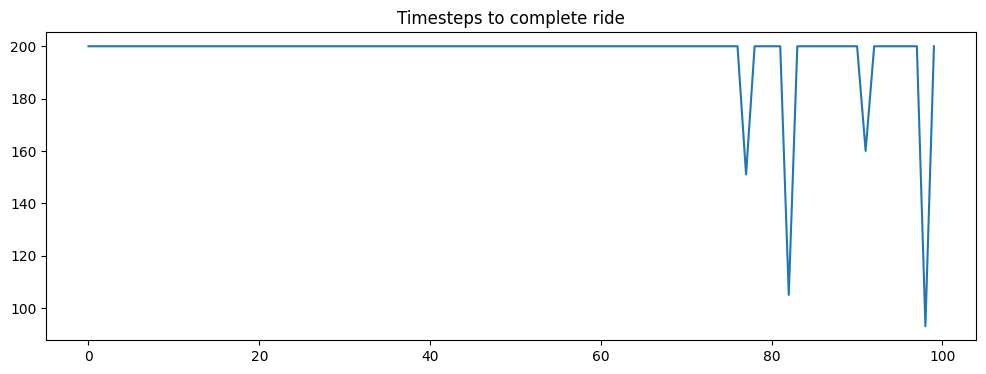

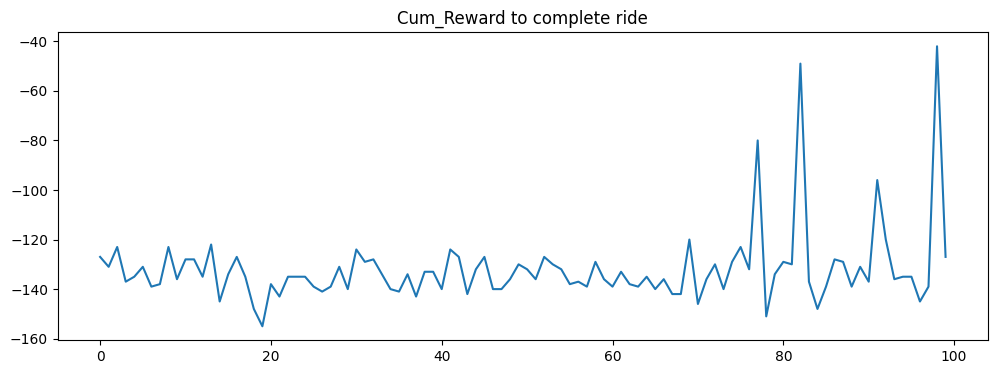

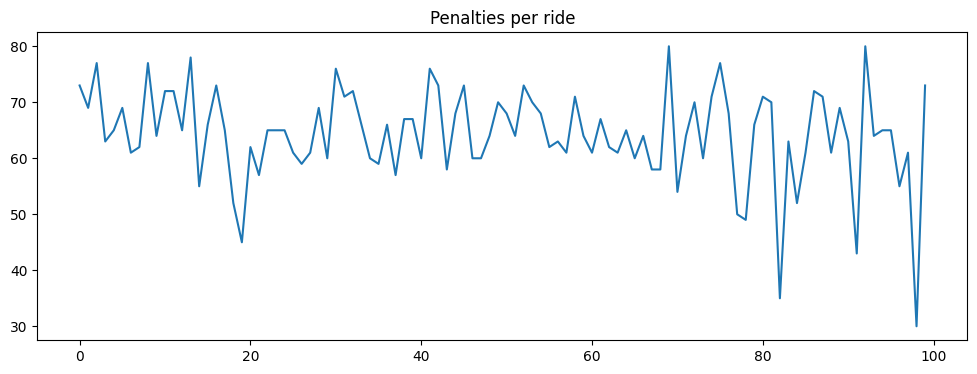

In [6]:

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Timesteps to complete ride")    
pd.Series(timesteps_per_episode).plot(kind="line")
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Cum_Reward to complete ride")    
pd.Series( cumReward_per_episode).plot(kind="line")
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Penalties per ride")    
pd.Series(penalties_per_episode).plot(kind="line")
plt.show()